In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']
mydata = pd.read_csv('abalone_dataset.csv',sep="\t")
df = mydata.iloc[:, :]
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight','Rings']

In [83]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
df["Sex"]= label_encoder.fit_transform(df["Sex"]) 
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,3
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [85]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,2.028968
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,0.655710
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,2.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,2.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


In [86]:
import pandas as pd
import numpy as np
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.032157
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.580662
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.595623
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.562097
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540373
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.444997
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.515325
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.604474
Rings,-0.032157,0.580662,0.595623,0.562097,0.540373,0.444997,0.515325,0.604474,1.000000


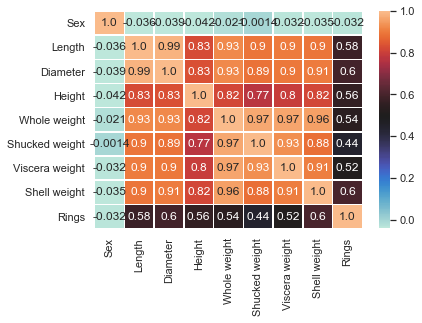

In [87]:
import numpy as np
import seaborn as sns
sns.set()
ax = sns.heatmap(corr, center=0.5, annot=True, linewidths=.5, fmt=".2")

In [88]:
def train_validation_data(df,size,features="all"):
    if(features=="all"):
        X = df.drop(["Rings"],axis=1).values
        y = df.Rings
        return X[:size],X[size:],y[:size],y[size:] #X_train, X_test, y_train, y_test
    else:
        X = df.drop(["Rings"],axis=1).values
        y = df.Rings
        return X[:size,:features],X[size:,:features],y[:size],y[size:] #X_train, X_test, y_train, y_test


In [89]:
def get_labels(y_pred):
    labels = []
    for val in y_pred:
        if val==1:
            labels.append("young")
        elif val==2:
            labels.append("middle")
        else:
            labels.append("old")
    return labels

In [90]:
def PlotConfussion(y_test,y_pred):
    from sklearn.metrics import confusion_matrix, classification_report
    print(classification_report(y_test, y_pred))
    mat_labels = ["young","middle","old"]
    conf = confusion_matrix(y_test, y_pred,)
    sns.set()
    ax = sns.heatmap(conf.T, center=0.5, annot=True, linewidths=.5, xticklabels= mat_labels, yticklabels= mat_labels)
    plt.xlabel('true label')
    plt.ylabel('predicted label')

In [102]:
def naive_bayes_report(df,size=100,features="all"):
    X_train, X_test, y_train, y_test = train_validation_data(df,size,features)
    from sklearn.naive_bayes import GaussianNB
    gnb = GaussianNB()
    model = gnb.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    print("Number of mislabeled points out of a total {} points : {}".format(X_test.shape[0], (y_test != y_pred).sum()))
    print("Accuracy score : {}".format(model_score))
    PlotConfussion(y_test,y_pred)

### for first 3 features

Number of mislabeled points out of a total 4077 points : 2066
Accuracy score : 0.49325484424822175
              precision    recall  f1-score   support

           1       0.74      0.67      0.71       821
           2       0.61      0.36      0.45      2330
           3       0.32      0.67      0.43       926

    accuracy                           0.49      4077
   macro avg       0.56      0.57      0.53      4077
weighted avg       0.57      0.49      0.50      4077



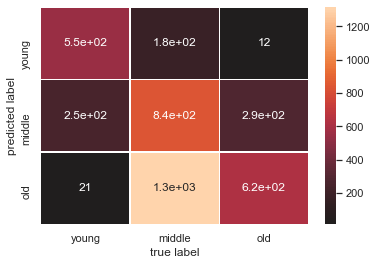

In [103]:
naive_bayes_report(df,100,3)

Number of mislabeled points out of a total 3177 points : 1809
Accuracy score : 0.43059490084985835
              precision    recall  f1-score   support

           1       0.80      0.62      0.70       624
           2       0.61      0.27      0.37      1974
           3       0.25      0.78      0.37       579

    accuracy                           0.43      3177
   macro avg       0.55      0.56      0.48      3177
weighted avg       0.58      0.43      0.44      3177



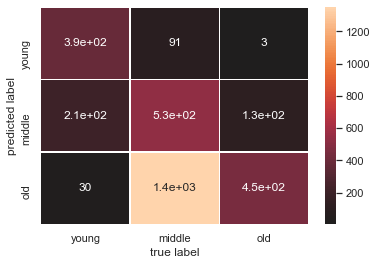

In [94]:
naive_bayes_report(df,1000,3)

### for all features

Number of mislabeled points out of a total 4077 points : 1975
Accuracy score : 0.5155751778268335
              precision    recall  f1-score   support

           1       0.68      0.78      0.73       821
           2       0.66      0.36      0.47      2330
           3       0.34      0.67      0.45       926

    accuracy                           0.52      4077
   macro avg       0.56      0.60      0.55      4077
weighted avg       0.59      0.52      0.51      4077



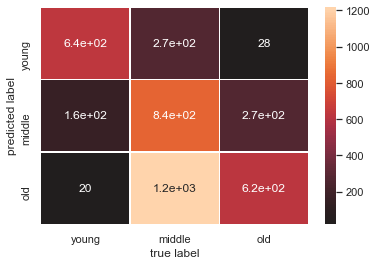

In [95]:
naive_bayes_report(df,100)

Number of mislabeled points out of a total 3177 points : 1640
Accuracy score : 0.48378973874724585
              precision    recall  f1-score   support

           1       0.71      0.76      0.74       624
           2       0.70      0.33      0.44      1974
           3       0.26      0.72      0.39       579

    accuracy                           0.48      3177
   macro avg       0.56      0.60      0.52      3177
weighted avg       0.62      0.48      0.49      3177



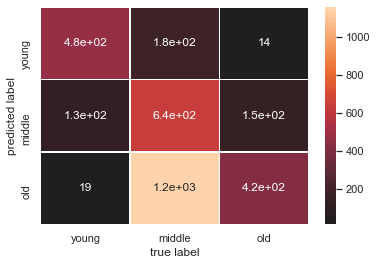

In [96]:
naive_bayes_report(df,1000)